# Observations

1.  Capomulin and Ramicane were the most effective drugs at reducing the final tumor size compared to Infubinol and Ceftamin. Ramicane could be seen as the best drug as its median is lower than Capomulin, indicating that the tumor size will be, on average, smaller when using Capomulin
  
2. The correlation coefficient between mouse weight and the average tumor volume is 0.84. It being closer to 1 and positive shows that there is a strong positive relationship between the mouse weight and average tumor size; as the weight increases, the tumor size also increases  
  
3. The R-Squared value (0.84<sup>2</sup>) = 0.7056 indicates that the model fits fairly well with the data. Any calculations made on the data to predict results will be fairly accurate.

# Pymaceuticals Inc.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "outer")

# Display the data table for preview
mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
number_mice = mouse_data.groupby("Mouse ID").count()
print(f'The number of mice is {len(number_mice)}')

The number of mice is 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#array(['g989'], dtype=object)
mouse_data.loc[mouse_data.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data.loc[mouse_data["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_data[mouse_data['Mouse ID'] != 'g989']
clean_mouse_data = clean_mouse_data.sort_values("Timepoint", ascending = True).reset_index(drop = True)
clean_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,v409,0,45.0,0,Placebo,Female,16,25
2,u946,0,45.0,0,Propriva,Male,5,30
3,w140,0,45.0,0,Zoniferol,Female,19,30
4,a577,0,45.0,0,Infubinol,Female,6,25


In [6]:
# Checking the number of mice in the clean DataFrame.
print(f'The number of mice in clean DataFrame is {len(clean_mouse_data.groupby("Mouse ID").count())}')

The number of mice in clean DataFrame is 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdev = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_table_df = pd.DataFrame({"Mean Tumor Volume": mean,
                                 "Median Tumor Volume": median,
                                 "Tumor Volume Variance": variance,
                                 "Tumor Volume Std. Dev.": stdev,
                                 "Tumor Volume Std. Err.": sem})
summary_table_df
# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table_two_df = clean_mouse_data.groupby('Drug Regimen').agg({"Tumor Volume (mm3)": ['mean','median','var','std','sem']})
summary_table_two_df
# This method produces everything in a single groupby function

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

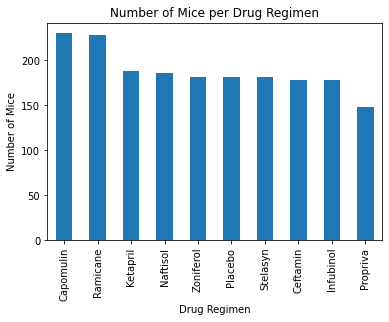

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
treatment_mice_count = pd.DataFrame(clean_mouse_data.groupby("Drug Regimen")["Mouse ID"].count())
treatment_mice_count = treatment_mice_count.sort_values("Mouse ID", ascending = False)

treatment_mice_count.plot(kind = "bar", title = "Number of Mice per Drug Regimen", ylabel = "Number of Mice", legend = False)
plt.show()

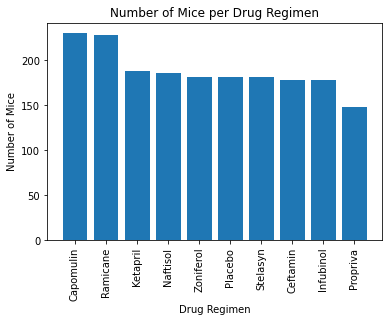

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
treatment_mice_count = treatment_mice_count.reset_index()
plt.xticks(rotation=90)
plt.bar(treatment_mice_count["Drug Regimen"], treatment_mice_count["Mouse ID"], align = "center")
plt.title("Number of Mice per Drug Regimen")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.show()

In [11]:
# Grouping mice by Mouse ID and Sex
gender_mouse_df = pd.DataFrame(clean_mouse_data.groupby(["Mouse ID", "Sex"]).count())
gender_mouse_df = pd.DataFrame(gender_mouse_df.groupby(["Sex"]).count())["Timepoint"]
gender_mouse_df = pd.DataFrame(gender_mouse_df)
total_mice = gender_mouse_df.sum()
gender_mouse_df["Percentage of Sex"] = gender_mouse_df / total_mice
gender_mouse_df = gender_mouse_df.rename(columns = {"Timepoint": "Total"})
gender_mouse_df

,Total,Percentage of Sex
Sex,,
Female,123,0.495968
Male,125,0.504032


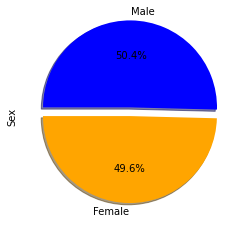

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ["orange", "blue"]
explode = [0, 0.1]
gender_mouse_df.plot.pie(y="Total", colors = colors, startangle = 180, autopct = "%1.1f%%", legend = False, ylabel = "Sex", explode = explode, shadow = True)
plt.show()

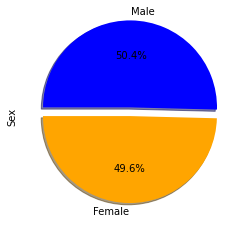

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [0.495968, 0.504032]
colors = ["orange", "blue"]
explode = [0, 0.1]
plt.pie(sizes, labels = labels, autopct = "%1.1f%%", startangle = 180, colors = colors, explode = explode, shadow = True)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Capomulin",:]
ramicane = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Ramicane", :]
infubinol = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Infubinol", :]
ceftamin = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Ceftamin", :]

merged_regimen = pd.merge(capomulin, ramicane, how = "outer")
merged_regimen = pd.merge(merged_regimen, infubinol, how = "outer")
merged_regimen = pd.merge(merged_regimen, ceftamin, how = "outer")

# Start by getting the last (greatest) timepoint for each mouse
max_capomulin = merged_regimen.groupby("Mouse ID")["Timepoint"].max()
max_ramicane = merged_regimen.groupby("Mouse ID")["Timepoint"].max()
max_infubinol = merged_regimen.groupby("Mouse ID")["Timepoint"].max()
max_ceftamin = merged_regimen.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_regimens = pd.merge(max_capomulin, clean_mouse_data, how = "left", on=["Mouse ID", "Timepoint"])
max_regimens = pd.merge(max_regimens, max_ramicane, how = "left", on=["Mouse ID", "Timepoint"])
max_regimens = pd.merge(max_regimens, max_infubinol, how = "left", on=["Mouse ID", "Timepoint"])
max_regimens = pd.merge(max_regimens, max_ceftamin, how = "left", on=["Mouse ID", "Timepoint"])

max_regimens

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_ls = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = max_regimens["Tumor Volume (mm3)"].loc[max_regimens["Drug Regimen"] == regimen]
    
    # add subset 
    tumor_vol_ls.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    print(f"The lower quartile of temperatures is: {lowerq}")
    print(f"The upper quartile of temperatures is: {upperq}")
    print(f'For {regimen}, Interquartile Range (IQR) is {iqr}')
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f'For {regimen}, values below {lower_bound} could be outliers')
    print(f'For {regimen}, values above {upper_bound} could be outliers')
    print(" ")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
For Capomulin, Interquartile Range (IQR) is 7.781863460000004
For Capomulin, values below 20.70456164999999 could be outliers
For Capomulin, values above 51.83201549 could be outliers
 
The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
For Ramicane, Interquartile Range (IQR) is 9.098536719999998
For Ramicane, values below 17.912664470000003 could be outliers
For Ramicane, values above 54.30681135 could be outliers
 
The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
For Infubinol, Interquartile Range (IQR) is 11.477135160000003
For Infubinol, values below 36.83290494999999 could be outliers
For Infubinol, values above 82.74144559000001 could be outliers
 
The lower quartile of temperatures is: 48.72207785
The upper quartile of temperatures is: 64.29983003
For Ceftamin, Interquartile Ra

<ipython-input-16-3677752d81e1>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(regimens)


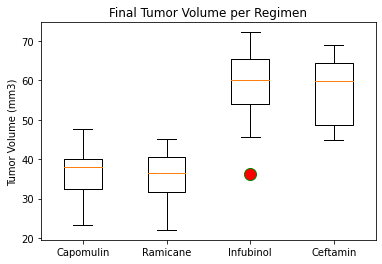

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume per Regimen")
ax1.set_xticklabels(regimens)
ax1.set_ylabel("Tumor Volume (mm3)")

flierprops = dict(marker = 'o', markerfacecolor = 'r', markersize = 12, linestyle = 'none', markeredgecolor = 'g')
ax1.boxplot(tumor_vol_ls, flierprops = flierprops)
plt.show()

## Line and Scatter Plots

In [17]:
mouse = capomulin.loc[capomulin["Mouse ID"] == "b128"]
mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
478,b128,5,45.651331,0,Capomulin,Female,9,22
484,b128,10,43.270852,0,Capomulin,Female,9,22
888,b128,15,43.784893,0,Capomulin,Female,9,22
1102,b128,20,42.731552,0,Capomulin,Female,9,22
1166,b128,25,43.262145,1,Capomulin,Female,9,22
1358,b128,30,40.605335,1,Capomulin,Female,9,22
1473,b128,35,37.967644,1,Capomulin,Female,9,22
1632,b128,40,38.379726,2,Capomulin,Female,9,22
1785,b128,45,38.982878,2,Capomulin,Female,9,22


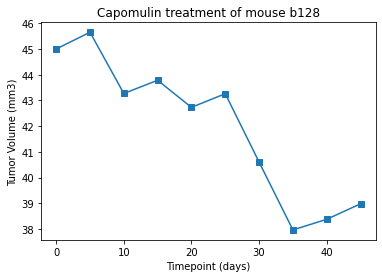

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"], marker = 's')
plt.title("Capomulin treatment of mouse b128")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

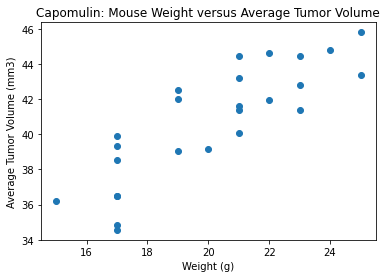

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_avg_tumor = capomulin.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg_tumor["Weight (g)"], cap_avg_tumor["Tumor Volume (mm3)"])
plt.title("Capomulin: Mouse Weight versus Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
cor_coef = round(st.pearsonr(cap_avg_tumor["Weight (g)"], cap_avg_tumor["Tumor Volume (mm3)"])[0],2)

print(f"The correlation coefficient between mouse weight and the average tumor volume is {cor_coef}")

The correlation coefficient between mouse weight and the average tumor volume is 0.84


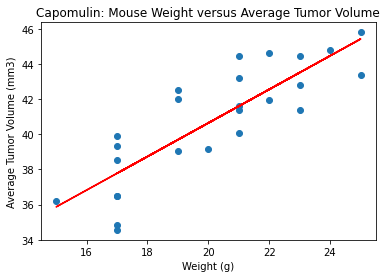

In [21]:
# Calculate the linear regression model for mouse weight and average tumor volume
x_values = cap_avg_tumor["Weight (g)"]
y_values = cap_avg_tumor["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Capomulin: Mouse Weight versus Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()